# Lab 10

In [18]:
import networkx as nx
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm.notebook import tqdm

from utils.plotting import set_white_ticks, pretty_draw, draw_degree_histogram, get_context_for_dark_IDE

%matplotlib inline
SEED_SRC = 42
random.seed(SEED_SRC)
np.random.seed(SEED_SRC)

In [19]:
class SIR:
    COLOR_S = 'blue'
    COLOR_I = 'red'
    COLOR_R = 'green'


    def __init__(self, beta, gamma):
        self.beta = beta
        self.gamma = gamma

    @staticmethod
    def get_color_map_from_state(graph):
        colors = []
        for v, att in graph.nodes.data():
            if att['state'] == 'S':
                colors.append(SIR.COLOR_S)
            elif att['state'] == 'I':
                colors.append(SIR.COLOR_I)
            elif att['state'] == 'R':
                colors.append(SIR.COLOR_R)
        return colors

    def step(self, graph):
        for v, att in graph.nodes.data():
            if att['state'] == 'I':
                if random.random() < self.gamma:
                    att['state'] = 'R'
                for u in graph.neighbors(v):
                    if graph.nodes[u]['state'] == 'S':
                        if random.random() < self.beta:
                            graph.nodes[u]['state'] = 'I'




def generate_animation_and_plot_SIR(graph, beta, gamma, save_path, sim_len):
    fig, axs = plt.subplots(ncols=2, figsize=(32,16))
    fig.suptitle(f"SIR beta={beta}, gamma={gamma}", fontsize=20)
    pos = nx.kamada_kawai_layout(graph)
    for v, att in graph.nodes.data():
        att['state'] = 'S'
    start_vertex = random.choice(graph.nodes)
    start_vertex['state'] = 'I'

    model = SIR(beta, gamma)
    s_count = [len(graph.nodes) - 1]
    i_count = [1]
    r_count = []



    def update(frame, *fargs):
        for ax in axs:
            ax.clear()
        model.step(graph)

        dgrs = dict(graph.degree)
        nx.draw_networkx_nodes(graph, ax=axs[0], pos=pos,
                               node_size=[v * 10 for v in dgrs.values()],
                               alpha=0.9,
                               node_color=model.get_color_map_from_state(G))
        nx.draw_networkx_edges(graph, ax=axs[0], pos=pos, alpha=0.2)

        s_count.append(len([v for v, att in G.nodes.data() if att['state'] == 'S']))
        i_count.append(len([v for v, att in G.nodes.data() if att['state'] == 'I']))
        r_count.append(len([v for v, att in G.nodes.data() if att['state'] == 'R']))

        axs[1].plot(s_count, color=SIR.COLOR_S, label='S')
        axs[1].plot(i_count, color=SIR.COLOR_I, label='I')
        axs[1].plot(r_count, color=SIR.COLOR_R, label='R')
        axs[1].legend()
        axs[1].set_xlim(0, sim_len)

    ani = anim.FuncAnimation(fig, update, frames=sim_len, interval=200, repeat=False, blit=False)
    ani.save(save_path)





In [20]:
sim_len = 300
N = 300
M = 5
beta = 0.01
gamma = 0.02
G = nx.generators.barabasi_albert_graph(N, M, seed=SEED_SRC)

with get_context_for_dark_IDE():
    generate_animation_and_plot_SIR(G, beta, gamma, '../animation/BA_SIR.gif', sim_len)

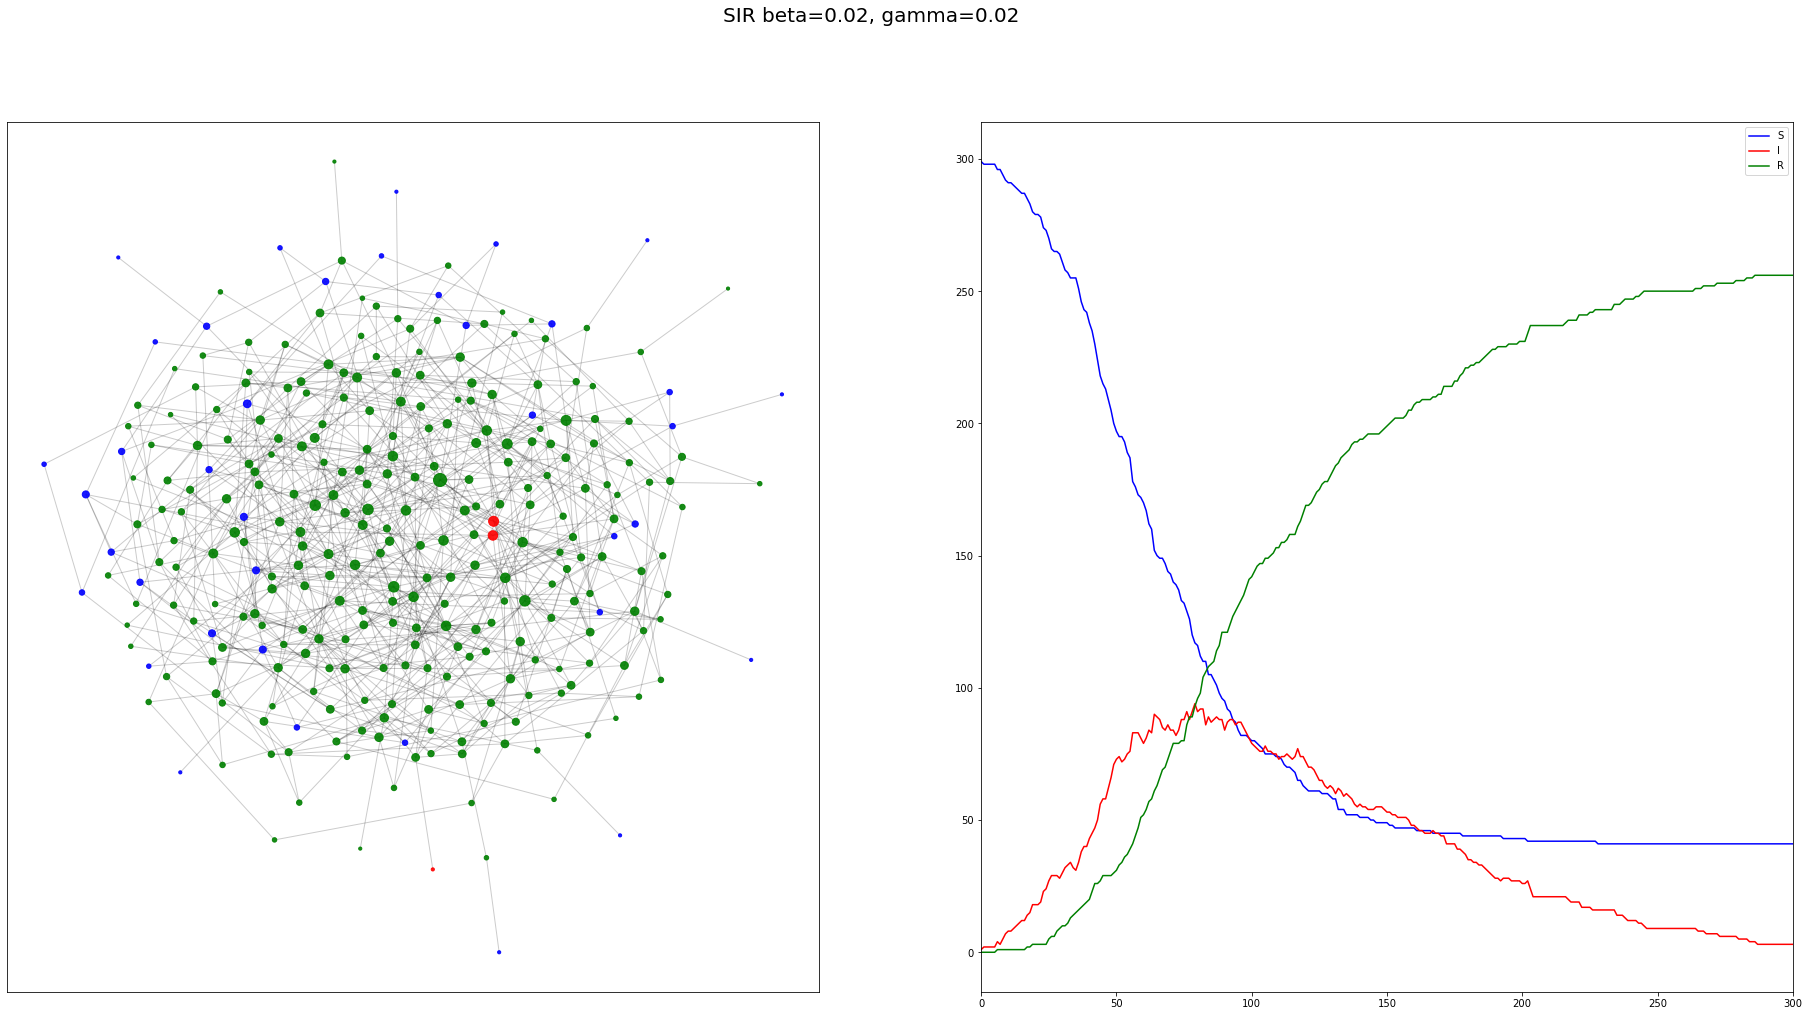

In [25]:
sim_len = 300
N = 300
p = 5 / 300
beta = 0.02
gamma = 0.02
G = nx.generators.erdos_renyi_graph(N, p, seed=SEED_SRC)

with get_context_for_dark_IDE():
    generate_animation_and_plot_SIR(G, beta, gamma, '../animation/ER_SIR.gif', sim_len)


In [22]:
class SIS:
    COLOR_S = 'blue'
    COLOR_I = 'red'


    def __init__(self, beta, gamma):
        self.beta = beta
        self.gamma = gamma

    @staticmethod
    def get_color_map_from_state(graph):
        colors = []
        for v, att in graph.nodes.data():
            if att['state'] == 'S':
                colors.append(SIR.COLOR_S)
            elif att['state'] == 'I':
                colors.append(SIR.COLOR_I)
        return colors

    def step(self, graph):
        for v, att in graph.nodes.data():
            if att['state'] == 'I':
                if random.random() < self.gamma:
                    att['state'] = 'S'
                for u in graph.neighbors(v):
                    if graph.nodes[u]['state'] == 'S':
                        if random.random() < self.beta:
                            graph.nodes[u]['state'] = 'I'




def generate_animation_and_plot_SIS(graph, beta, gamma, save_path, sim_len):
    fig, axs = plt.subplots(ncols=2, figsize=(32,16))
    fig.suptitle(f"SIS beta={beta}, gamma={gamma}", fontsize=20)
    pos = nx.kamada_kawai_layout(graph)
    for v, att in graph.nodes.data():
        att['state'] = 'S'
    start_vertex = random.choice(graph.nodes)
    start_vertex['state'] = 'I'

    model = SIS(beta, gamma)
    s_count = [len(graph.nodes) - 1]
    i_count = [1]



    def update(frame, *fargs):
        for ax in axs:
            ax.clear()
        model.step(graph)

        dgrs = dict(graph.degree)
        nx.draw_networkx_nodes(graph, ax=axs[0], pos=pos,
                               node_size=[v * 10 for v in dgrs.values()],
                               alpha=0.9,
                               node_color=model.get_color_map_from_state(G))
        nx.draw_networkx_edges(graph, ax=axs[0], pos=pos, alpha=0.2)

        s_count.append(len([v for v, att in G.nodes.data() if att['state'] == 'S']))
        i_count.append(len([v for v, att in G.nodes.data() if att['state'] == 'I']))

        axs[1].plot(s_count, color=SIR.COLOR_S, label='S')
        axs[1].plot(i_count, color=SIR.COLOR_I, label='I')
        axs[1].legend()
        axs[1].set_xlim(0, sim_len)

    ani = anim.FuncAnimation(fig, update, frames=sim_len, interval=200, repeat=False, blit=False)
    ani.save(save_path)

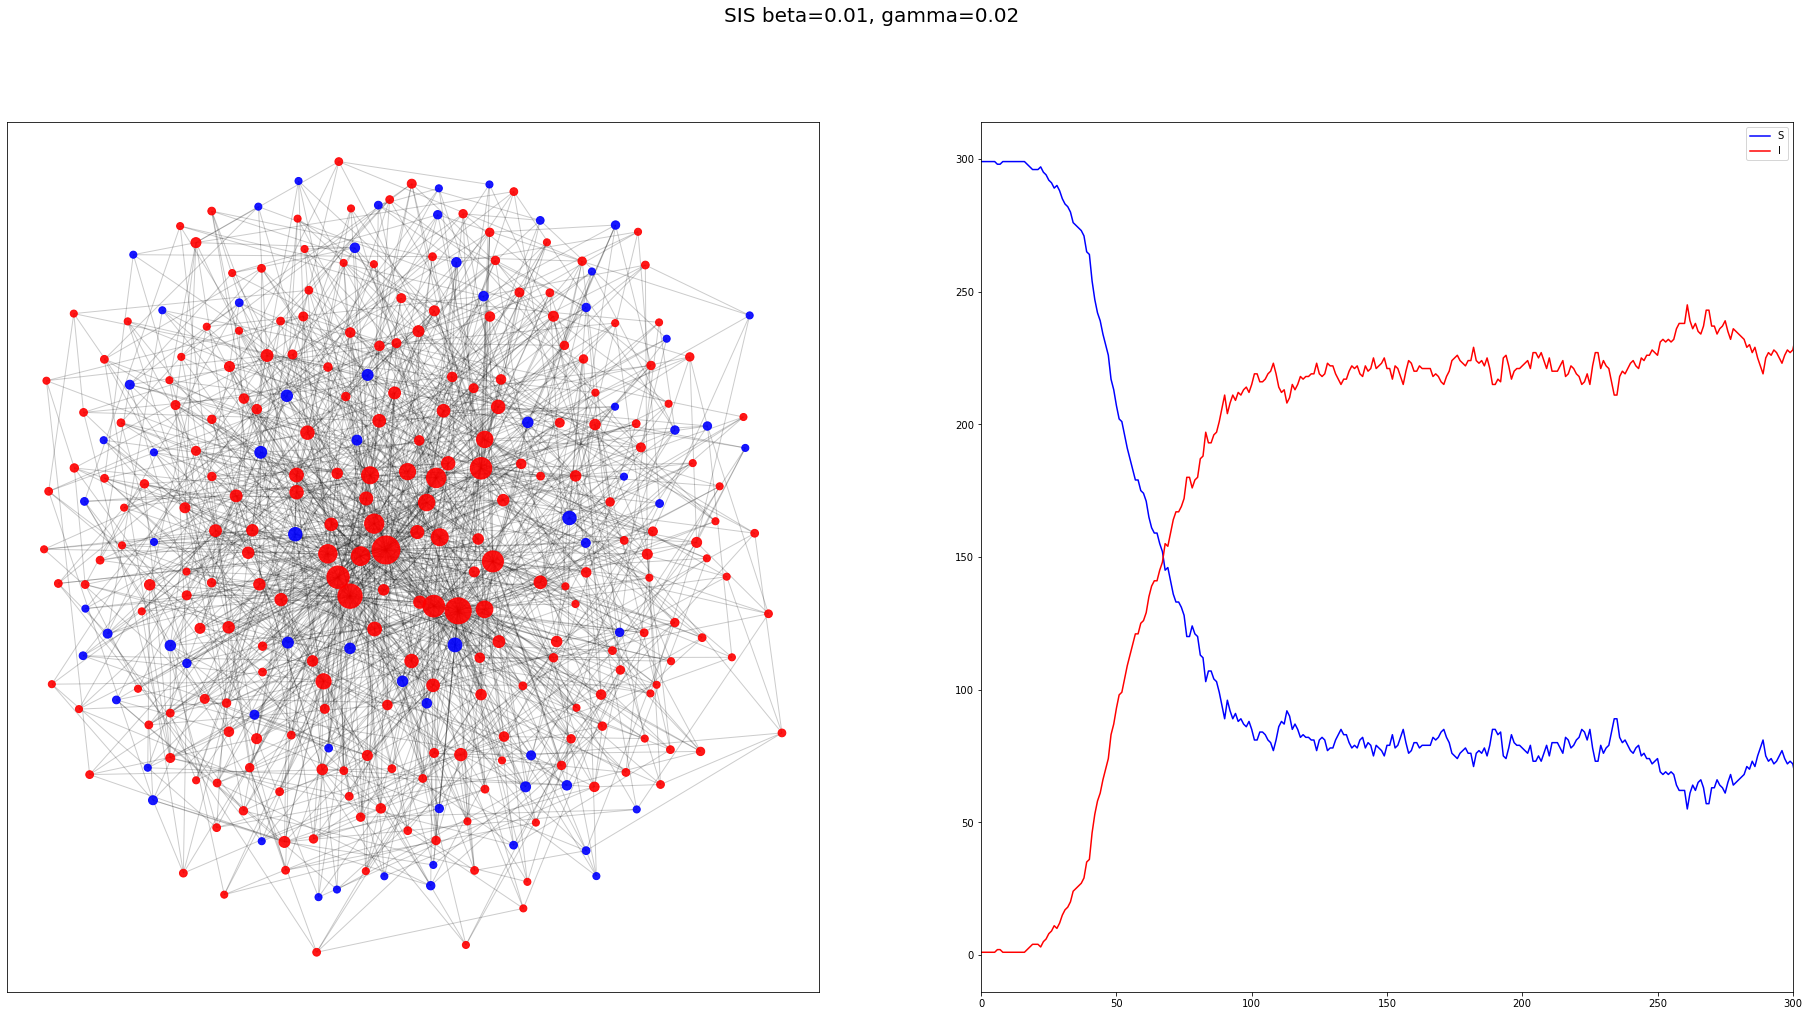

In [23]:
sim_len = 300
N = 300
M = 5
beta = 0.01
gamma = 0.02
G = nx.generators.barabasi_albert_graph(N, M, seed=SEED_SRC)

with get_context_for_dark_IDE():
    generate_animation_and_plot_SIS(G, beta, gamma, '../animation/BA_SIS.gif', sim_len)

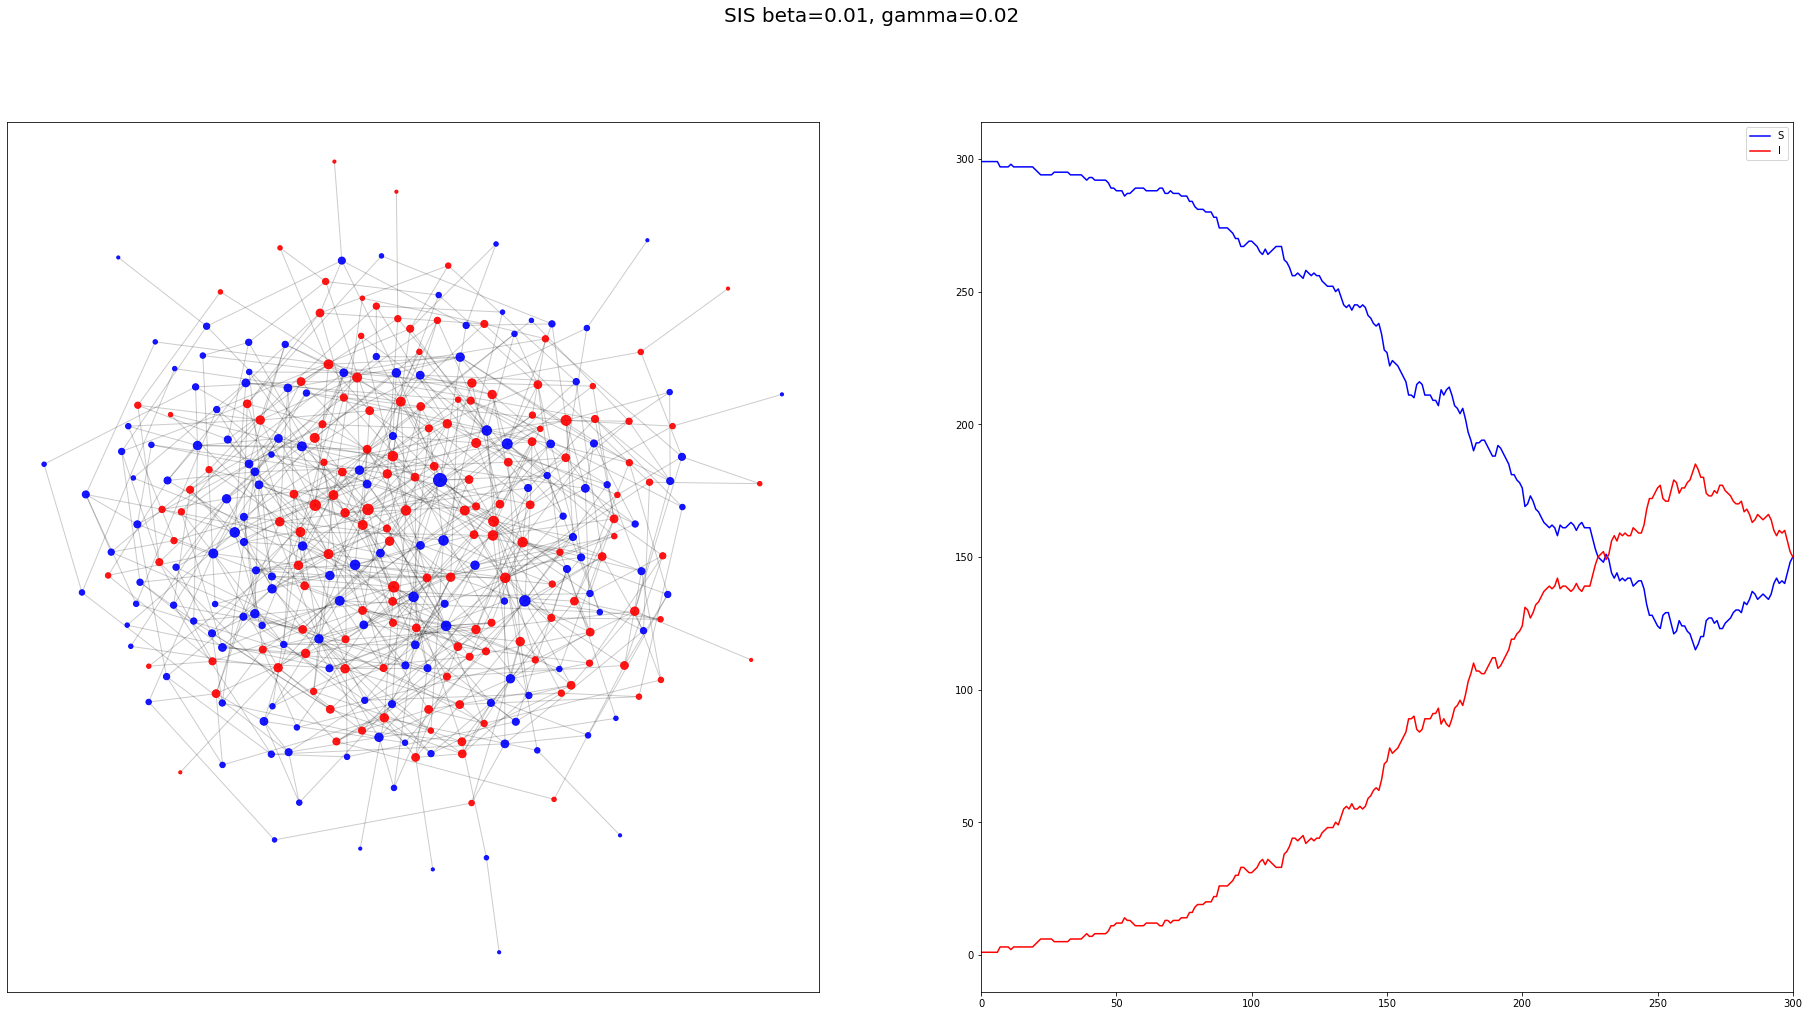

In [24]:
sim_len = 300
N = 300
p = 5 / 300
beta = 0.01
gamma = 0.02
G = nx.generators.erdos_renyi_graph(N, p, seed=SEED_SRC)

with get_context_for_dark_IDE():
    generate_animation_and_plot_SIS(G, beta, gamma, '../animation/ER_SIS.gif', sim_len)
